I will print the outputs of only the first 5 entries for all arrays and lists else you guys have to scroll through a lot to reach the next cell and it also takes a lot of time to commit. If you want to print all the entries, you can fork this kernel and just run a loop until the length of the array or list and print all entries.

In [ ]:
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# loading the data into the dataframe
df = pd.read_csv('/content/shanghai.csv') 
print(df) 

          date  AQI_24h  PM2.5_24h  PM10_24h  SO2_24h  NO2_24h  O3_24h  \
0     2021/1/1    55.53      37.89     58.21     9.74    57.11   22.37   
1     2021/1/2    72.88      53.17     64.71     9.29    65.96   26.58   
2     2021/1/3    65.39      42.30     51.26     5.22    53.52   32.09   
3     2021/1/4    42.12      20.71     41.88     4.79    51.71   34.17   
4     2021/1/5    48.92      32.12     45.21     5.71    31.25   53.38   
..         ...      ...        ...       ...      ...      ...     ...   
473  2022/4/19    55.62      38.29     55.62     8.25    25.58  122.42   
474  2022/4/20    71.29      43.71     70.50    10.25    23.42  148.54   
475  2022/4/21    66.50      45.88     57.25     7.58    17.25  145.33   
476  2022/4/22    53.08      36.54     47.67    10.12    24.42  116.08   
477  2022/4/23    33.21      16.96     17.25     5.54    14.96   90.46   

     CO_24h  l_temp  h_temp  temp  wet  wind   hpa  visibility  precipitation  \
0      0.83    -2.7     3.9   

In [ ]:
# viewing info about the columns
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           478 non-null    object 
 1   AQI_24h        478 non-null    float64
 2   PM2.5_24h      478 non-null    float64
 3   PM10_24h       478 non-null    float64
 4   SO2_24h        478 non-null    float64
 5   NO2_24h        478 non-null    float64
 6   O3_24h         478 non-null    float64
 7   CO_24h         478 non-null    float64
 8   l_temp         478 non-null    float64
 9   h_temp         478 non-null    float64
 10  temp           478 non-null    float64
 11  wet            478 non-null    int64  
 12  wind           478 non-null    float64
 13  hpa            478 non-null    int64  
 14  visibility     478 non-null    float64
 15  precipitation  478 non-null    float64
 16  cloud          478 non-null    int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 63.6

In [ ]:
#viewing few rows from the top
df.head()

date  AQI_24h  PM2.5_24h  PM10_24h  SO2_24h  NO2_24h  O3_24h  CO_24h  \
0  2021/1/1    55.53      37.89     58.21     9.74    57.11   22.37    0.83   
1  2021/1/2    72.88      53.17     64.71     9.29    65.96   26.58    0.90   
2  2021/1/3    65.39      42.30     51.26     5.22    53.52   32.09    0.62   
3  2021/1/4    42.12      20.71     41.88     4.79    51.71   34.17    0.45   
4  2021/1/5    48.92      32.12     45.21     5.71    31.25   53.38    0.54   

   l_temp  h_temp  temp  wet  wind   hpa  visibility  precipitation  cloud  
0    -2.7     3.9   0.1   45   0.1  1030        22.5            0.0     10  
1    -0.9     7.0   2.8   53   0.3  1030        14.7            0.0      8  
2     2.0    10.2   6.6   74   0.3  1030        17.1            0.0     10  
3     7.2    12.9   9.6   75   0.3  1027        17.7            0.0     36  
4     5.0     9.1   7.5   69   0.6  1029        14.9            0.0     76

In [ ]:
#number of rows and columns in the dataset
print(df.shape)

(478, 17)


In [ ]:
#statistical information about columns
print(df.describe())

          AQI_24h   PM2.5_24h    PM10_24h     SO2_24h     NO2_24h      O3_24h  \
count  478.000000  478.000000  478.000000  478.000000  478.000000  478.000000   
mean    48.276464   28.621611   44.669979    5.683975   34.173013   65.713452   
std     23.510271   17.200097   27.131350    1.720962   16.355499   24.880974   
min     10.170000    3.580000    8.460000    3.960000    4.090000    8.500000   
25%     32.042500   15.520000   27.760000    4.627500   22.400000   48.592500   
50%     43.620000   24.480000   37.750000    5.170000   30.980000   64.310000   
75%     60.562500   36.987500   54.770000    6.110000   42.110000   82.115000   
max    245.290000  112.790000  309.880000   20.960000  113.670000  148.540000   

           CO_24h      l_temp      h_temp        temp         wet        wind  \
count  478.000000  478.000000  478.000000  478.000000  478.000000  478.000000   
mean     0.638117   13.903766   20.240377   16.779498   71.230126    0.975523   
std      0.177690    8.4843

In [ ]:
#checking how many null values are in each column
df.isnull().sum()

date             0
AQI_24h          0
PM2.5_24h        0
PM10_24h         0
SO2_24h          0
NO2_24h          0
O3_24h           0
CO_24h           0
l_temp           0
h_temp           0
temp             0
wet              0
wind             0
hpa              0
visibility       0
precipitation    0
cloud            0
dtype: int64

Just doing `df.dropna()` drops all the NaN values only for the current execution of the cell. If you do the above `df.isnull().sum()` now, you can see that null values still persists. You can solve this by assigning the obtained output of 
`df.dopna()` to the variable `df` which stores our data (dataframe)

In [ ]:
#defining training and testing data
x_train = df[:440]
y_train = x_train['AQI_24h']
x_test = df[440:478]
y_test = x_test['AQI_24h']
print(y_test)

440    19.62
441    38.50
442    70.79
443    25.79
444    26.50
445    32.00
446    34.67
447    30.46
448    26.12
449    40.46
450    61.96
451    34.83
452    34.33
453    39.83
454    44.08
455    34.25
456    35.33
457    31.62
458    35.92
459    35.96
460    52.50
461    63.79
462    50.12
463    50.92
464    45.35
465    54.79
466    36.33
467    25.33
468    21.42
469    34.62
470    47.54
471    37.62
472    37.21
473    55.62
474    71.29
475    66.50
476    53.08
477    33.21
Name: AQI_24h, dtype: float64


There are many pollutants. Let's first try to predict PM2.5 concentration values. Let the years 2016 and 2017 be the testing set. As you can see below, these 2 years account for 21.9% of the data (test set)

In [ ]:
#Normalizing training data
train_norm = x_train['AQI_24h']

#converted into array as all the methods available are for arrays and not lists
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

#Scaling all values between 0 and 1 so that large values don't just dominate
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.19292276]
[0.26671487]
[0.2348588]
[0.13588806]
[0.16480946]


Even after normalization and scaing, null values are possible (many people disregard this). Let's check if any null values are present.

In [ ]:
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  1


In [ ]:
#removing null values 
train_norm = train_norm[train_norm!=0]

In [ ]:
#Normalizing testing data and repeating the same process as done for training data
test_norm = x_test['AQI_24h']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.]
[0.36539578]
[0.9903232]
[0.11941165]
[0.1331527]


In [ ]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1 
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  1


In [ ]:
#removing null values
test_norm = test_norm[test_norm != 0]

In [ ]:
print(train_norm.shape)
print(test_norm.shape)

(439,)
(37,)


Since this is a time series data, we should be predicting the values after looking at a set of values rather than just a single value like we usually do. This takes into account the correlation between the data points and the timestamps. Because the neighbours should be considered for how the values change over time. Let's define a function to do this.

The below function called split_sequence splits the sequence into sets of n values. This n is given as n_steps (step_size). For example, if n=3, we split the sequence in groups of 3. We create 2 empty lists and append the split sequences.

In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

Here the number of features = 1 as we will be predicting a single value. Let's reshape the split sequences into the format of number of rows, number of columns. (shape[0], shape[1]). In the output, we can see that groups of 3 since n_steps = 3 have been obtained.

In [ ]:
n_steps = 5
X_split_train, y_split_train = split_sequence(train_norm, n_steps)
#for i in range(len(X_split_train)):
    #print(X_split_train[i], y_split_train[i])
n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train)

[[[0.19292276]
  [0.26671487]
  [0.2348588 ]
  [0.13588806]
  [0.16480946]]

 [[0.26671487]
  [0.2348588 ]
  [0.13588806]
  [0.16480946]
  [0.15911024]]

 [[0.2348588 ]
  [0.13588806]
  [0.16480946]
  [0.15911024]
  [0.25871895]]

 ...

 [[0.24259952]
  [0.23409323]
  [0.21742089]
  [0.16638312]
  [0.17276284]]

 [[0.23409323]
  [0.21742089]
  [0.16638312]
  [0.17276284]
  [0.24030282]]

 [[0.21742089]
  [0.16638312]
  [0.17276284]
  [0.24030282]
  [0.2020245 ]]]
[[[0.19292276]
  [0.26671487]
  [0.2348588 ]
  [0.13588806]
  [0.16480946]]

 [[0.26671487]
  [0.2348588 ]
  [0.13588806]
  [0.16480946]
  [0.15911024]]

 [[0.2348588 ]
  [0.13588806]
  [0.16480946]
  [0.15911024]
  [0.25871895]]

 ...

 [[0.24259952]
  [0.23409323]
  [0.21742089]
  [0.16638312]
  [0.17276284]]

 [[0.23409323]
  [0.21742089]
  [0.16638312]
  [0.17276284]
  [0.24030282]]

 [[0.21742089]
  [0.16638312]
  [0.17276284]
  [0.24030282]
  [0.2020245 ]]]
[[[0.19292276]
  [0.26671487]
  [0.2348588 ]
  [0.13588806]
  [0

You can see below that, we predict the value for the first 3 values, then consider that output as one of the 3 values in the next set. For example, we preedict 0.1 first, then we take that 0.1 as input in the second set and so on.

In [ ]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[0.36539578 0.9903232  0.11941165 0.1331527  0.23959745] 0.2912715308689762
[0.9903232  0.11941165 0.1331527  0.23959745 0.29127153] 0.20979291658602678
[0.11941165 0.1331527  0.23959745 0.29127153 0.20979292] 0.12579833559125214
[0.1331527  0.23959745 0.29127153 0.20979292 0.12579834] 0.4033288174956455
[0.23959745 0.29127153 0.20979292 0.12579834 0.40332882] 0.8194310044513258


Let's define our neural network (LSTM: Long Short Term Memory). Let's add 50 nodes in our first layer with a ReLU (Rectified linear unit) activation. Their shape will be step size, number of features. Then we will add, a dense layer with one node for the output.

We can try out different optimizers to see which minimizes loss and maximizes accuracy. Stochastic gradient descent (SGD), Adam, AdaBoost, RMSProp are few of them. lr = learning rate, decay = by how much to decay the learning rate, momentum = how much should the gradient descent be accelerated to dampen oscillations, nesterov = whether to use nesterov momentum. Nesterov has stronger convergence for convex functions. And then we compile using MSE (mean squared loss) as our loss function.

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

#sgd = optimizers.SGD(lr=0.001, decay=1e-5, momentum=1.0, nesterov=False)
sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True) #good

#keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

Epoch 1/10
14/14 [==============================] - 3s 34ms/step - loss: 0.0268 - accuracy: 0.0000e+00 - val_loss: 0.1584 - val_accuracy: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0117 - accuracy: 0.0000e+00 - val_loss: 0.0921 - val_accuracy: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0094 - accuracy: 0.0000e+00 - val_loss: 0.0860 - val_accuracy: 0.0000e+00
Epoch 4/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0091 - accuracy: 0.0000e+00 - val_loss: 0.0927 - val_accuracy: 0.0000e+00
Epoch 5/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0090 - accuracy: 0.0000e+00 - val_loss: 0.0872 - val_accuracy: 0.0000e+00
Epoch 6/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0090 - accuracy: 0.0000e+00 - val_loss: 0.0879 - val_accuracy: 0.0000e+00
Epoch 7/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.0000e+00 - val_lo

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
yhat = model.predict(X_split_test)
for i in range(5):
    print(yhat[i])

1/1 [==============================] - 0s 203ms/step
[0.2472411]
[0.24170835]
[0.19243]
[0.18780696]
[0.2171621]


In [ ]:
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)

MSE: 0.07818


Below, I have plotted the actual true values (first plot) and preedicted values (second plot). One can visually see that the distribution is almost the same. This says that our predictions are very accurate.

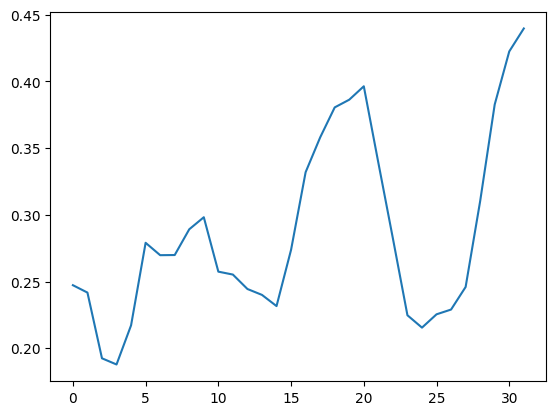

In [ ]:
plt.plot(yhat)

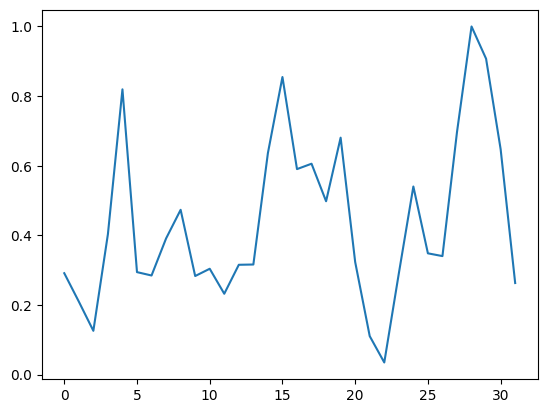

In [ ]:
plt.plot(y_split_test)

In [ ]:
train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)[1]
test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)[1]
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))


Train: 0.00000, Test: 0.00000


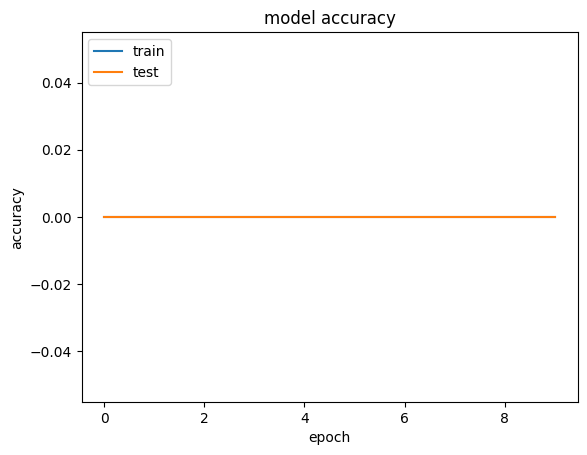

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Above, accuracy increase a lot in the last few epochs. Below, the loss gradually decrease. These are positive signs that our model is doing very good.

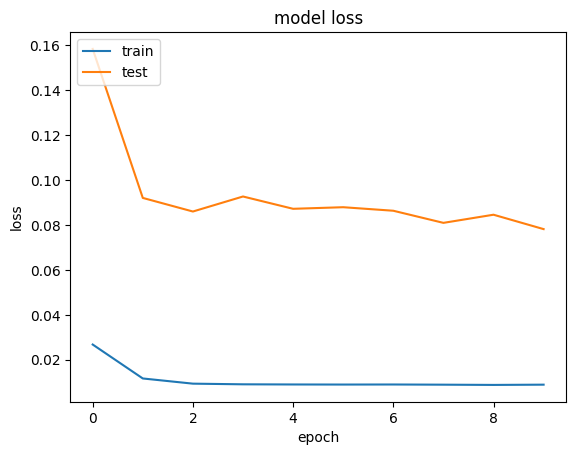

In [ ]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Until now, we just ran our model for prediction of a single pollutant. We have 6 pollutants in our dataset and can make predictions for all of them. So, I have made a function which can be used to predict the other pollutants rather than having to write the code again and again. I have commented the function calls. You can fork this kernel to uncomment and predit the other pollutants (Coz it would take up a lot of space and time).

In [ ]:
def compute(var):
    train_norm = x_train[var] 
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]
    
    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

    yhat = model.predict(X_split_test)

    mse = mean_squared_error(y_split_test, yhat)
    print(mse)
    
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0964 - val_accuracy: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 0.0885 - val_accuracy: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0859 - val_accuracy: 0.0000e+00
Epoch 4/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0837 - val_accuracy: 0.0000e+00
Epoch 5/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0832 - val_accuracy: 0.0000e+00
Epoch 6/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.0000e+00 - val_loss: 0.0817 - val_accuracy: 0.0000e+00
Epoch 7/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.0000e+00 - val_los

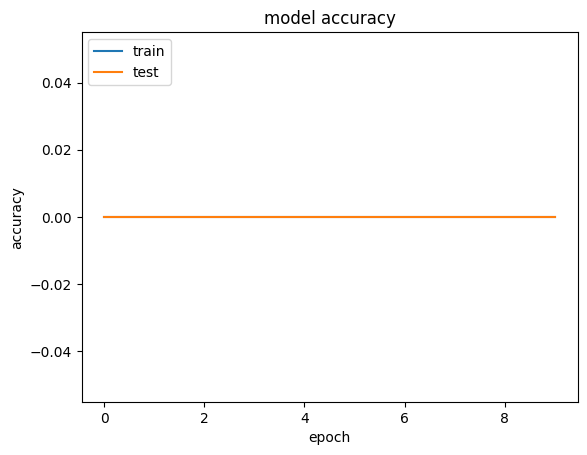

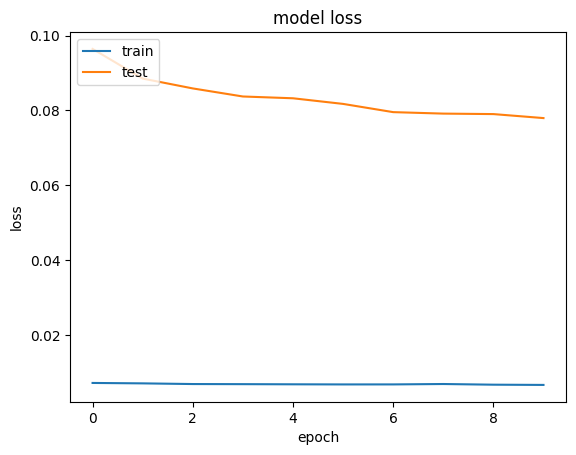

In [ ]:
compute('PM10_24h')

Epoch 1/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 0.0872 - val_accuracy: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 0.0830 - val_accuracy: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 0.0000e+00 - val_loss: 0.0846 - val_accuracy: 0.0000e+00
Epoch 4/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0822 - val_accuracy: 0.0000e+00
Epoch 5/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0806 - val_accuracy: 0.0000e+00
Epoch 6/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0791 - val_accuracy: 0.0000e+00
Epoch 7/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.0000e+00 - val_los

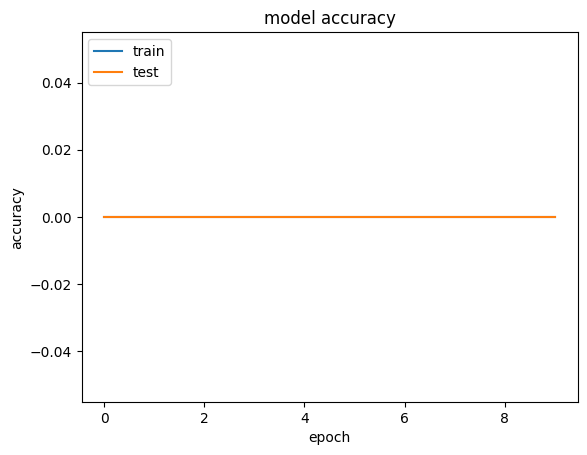

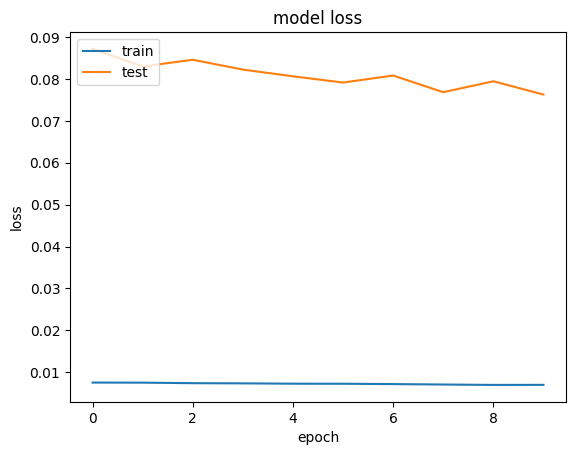

In [ ]:
compute('SO2_24h')

Epoch 1/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0131 - accuracy: 0.0000e+00 - val_loss: 0.0514 - val_accuracy: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 0.0000e+00 - val_loss: 0.0511 - val_accuracy: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.0000e+00 - val_loss: 0.0510 - val_accuracy: 0.0000e+00
Epoch 4/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.0023 - val_loss: 0.0511 - val_accuracy: 0.0000e+00
Epoch 5/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 0.0023 - val_loss: 0.0511 - val_accuracy: 0.0000e+00
Epoch 6/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 0.0023 - val_loss: 0.0516 - val_accuracy: 0.0000e+00
Epoch 7/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 0.0023 - val_loss: 0.0518 - val_

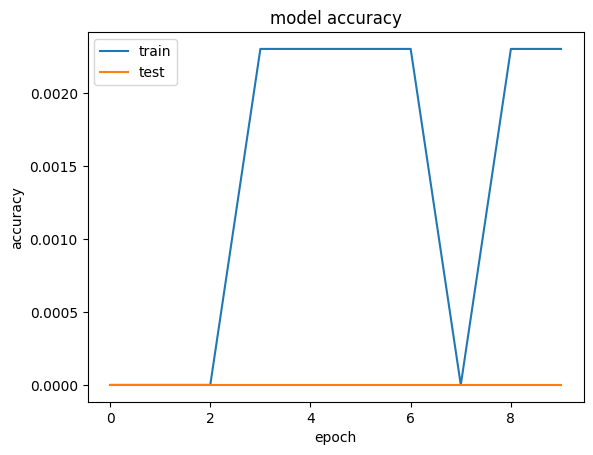

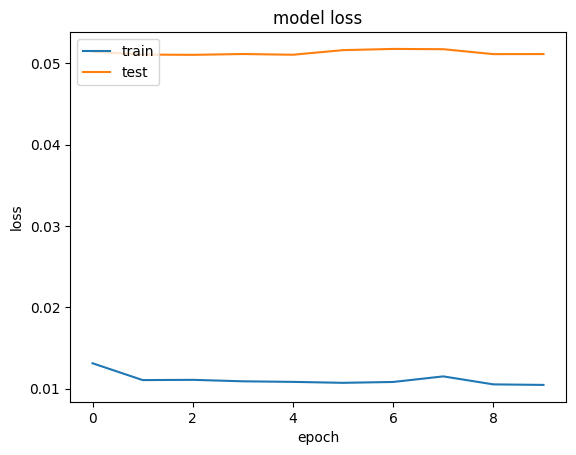

In [ ]:
compute('NO2_24h')

Epoch 1/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0183 - accuracy: 0.0023 - val_loss: 0.0360 - val_accuracy: 0.0312
Epoch 2/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0185 - accuracy: 0.0023 - val_loss: 0.0383 - val_accuracy: 0.0312
Epoch 3/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0180 - accuracy: 0.0023 - val_loss: 0.0388 - val_accuracy: 0.0312
Epoch 4/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0179 - accuracy: 0.0023 - val_loss: 0.0398 - val_accuracy: 0.0312
Epoch 5/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0177 - accuracy: 0.0023 - val_loss: 0.0389 - val_accuracy: 0.0312
Epoch 6/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0178 - accuracy: 0.0023 - val_loss: 0.0413 - val_accuracy: 0.0312
Epoch 7/10
14/14 [==============================] - 0s 12ms/step - loss: 0.0182 - accuracy: 0.0000e+00 - val_loss: 0.0369 - val_accuracy: 0.0312
Epoch 8/10
1

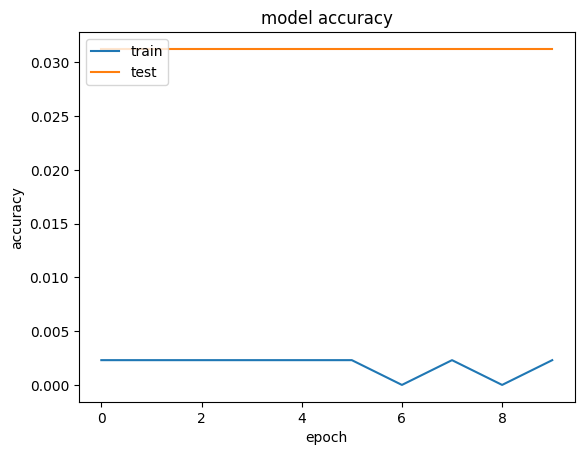

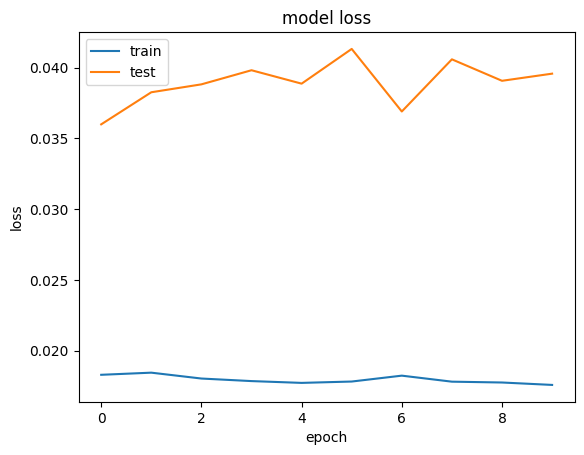

In [ ]:
compute('CO_24h')

Epoch 1/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0172 - accuracy: 0.0023 - val_loss: 0.0240 - val_accuracy: 0.0312
Epoch 2/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.0023 - val_loss: 0.0239 - val_accuracy: 0.0312
Epoch 3/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0168 - accuracy: 0.0023 - val_loss: 0.0264 - val_accuracy: 0.0312
Epoch 4/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0168 - accuracy: 0.0023 - val_loss: 0.0237 - val_accuracy: 0.0312
Epoch 5/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0164 - accuracy: 0.0023 - val_loss: 0.0242 - val_accuracy: 0.0312
Epoch 6/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0165 - accuracy: 0.0023 - val_loss: 0.0232 - val_accuracy: 0.0312
Epoch 7/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0164 - accuracy: 0.0023 - val_loss: 0.0222 - val_accuracy: 0.0312
Epoch 8/10
14/14 [=

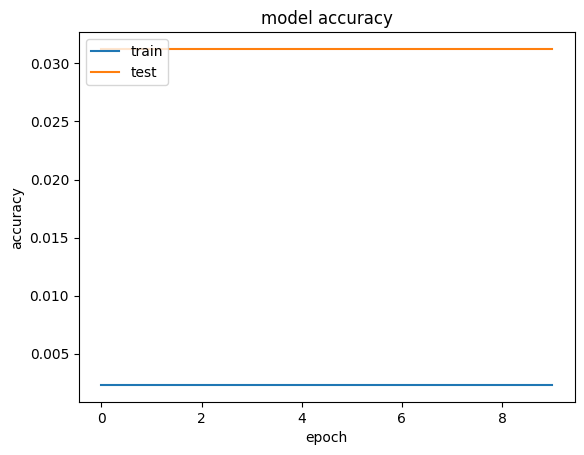

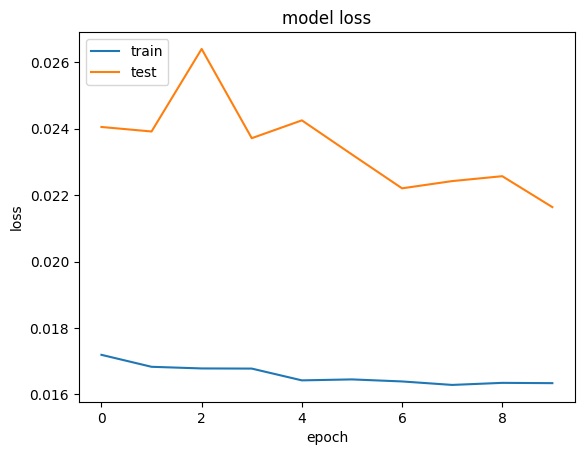

In [ ]:
compute('O3_24h')

Below, we will do a lot of visualizations to understand our data using various scatterplots, jointplots, pairplots, heatmap and correlation.

The above plot gives us the idea that these two conentrations are positively correlated with very few outliers.

<ipython-input-35-cdfa19613def>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

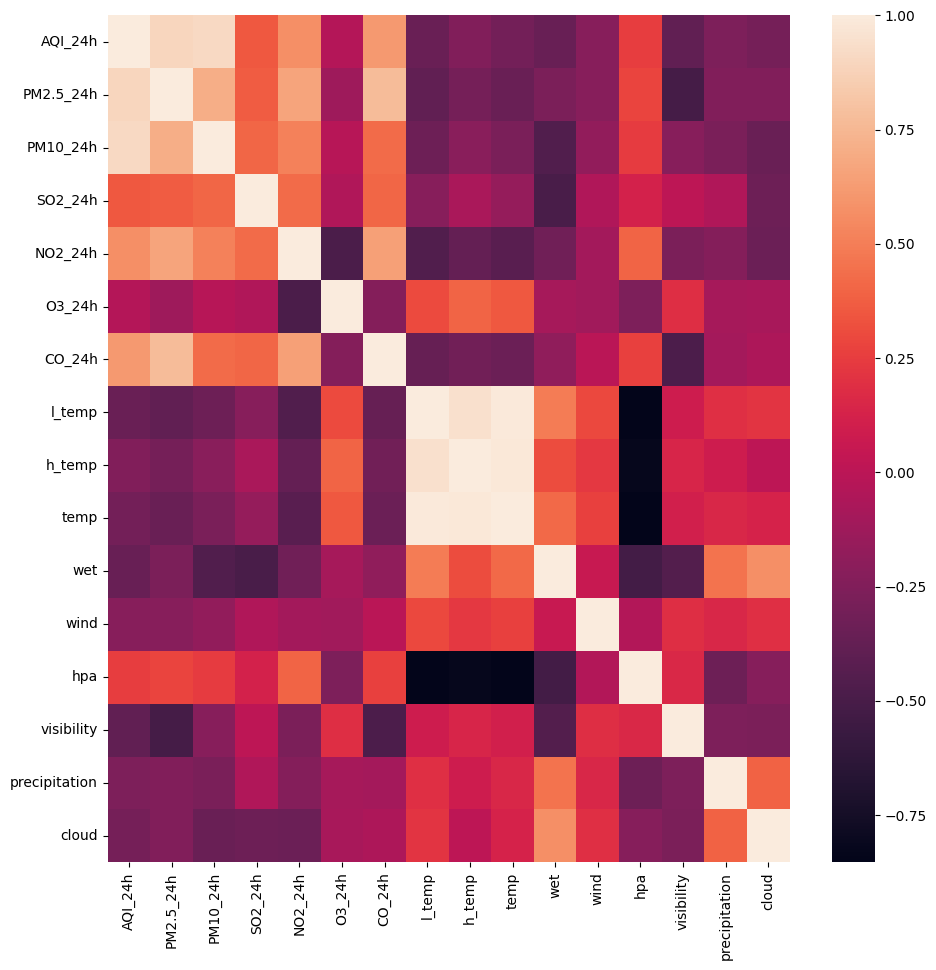

In [ ]:
#finding correlation
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corrmat)

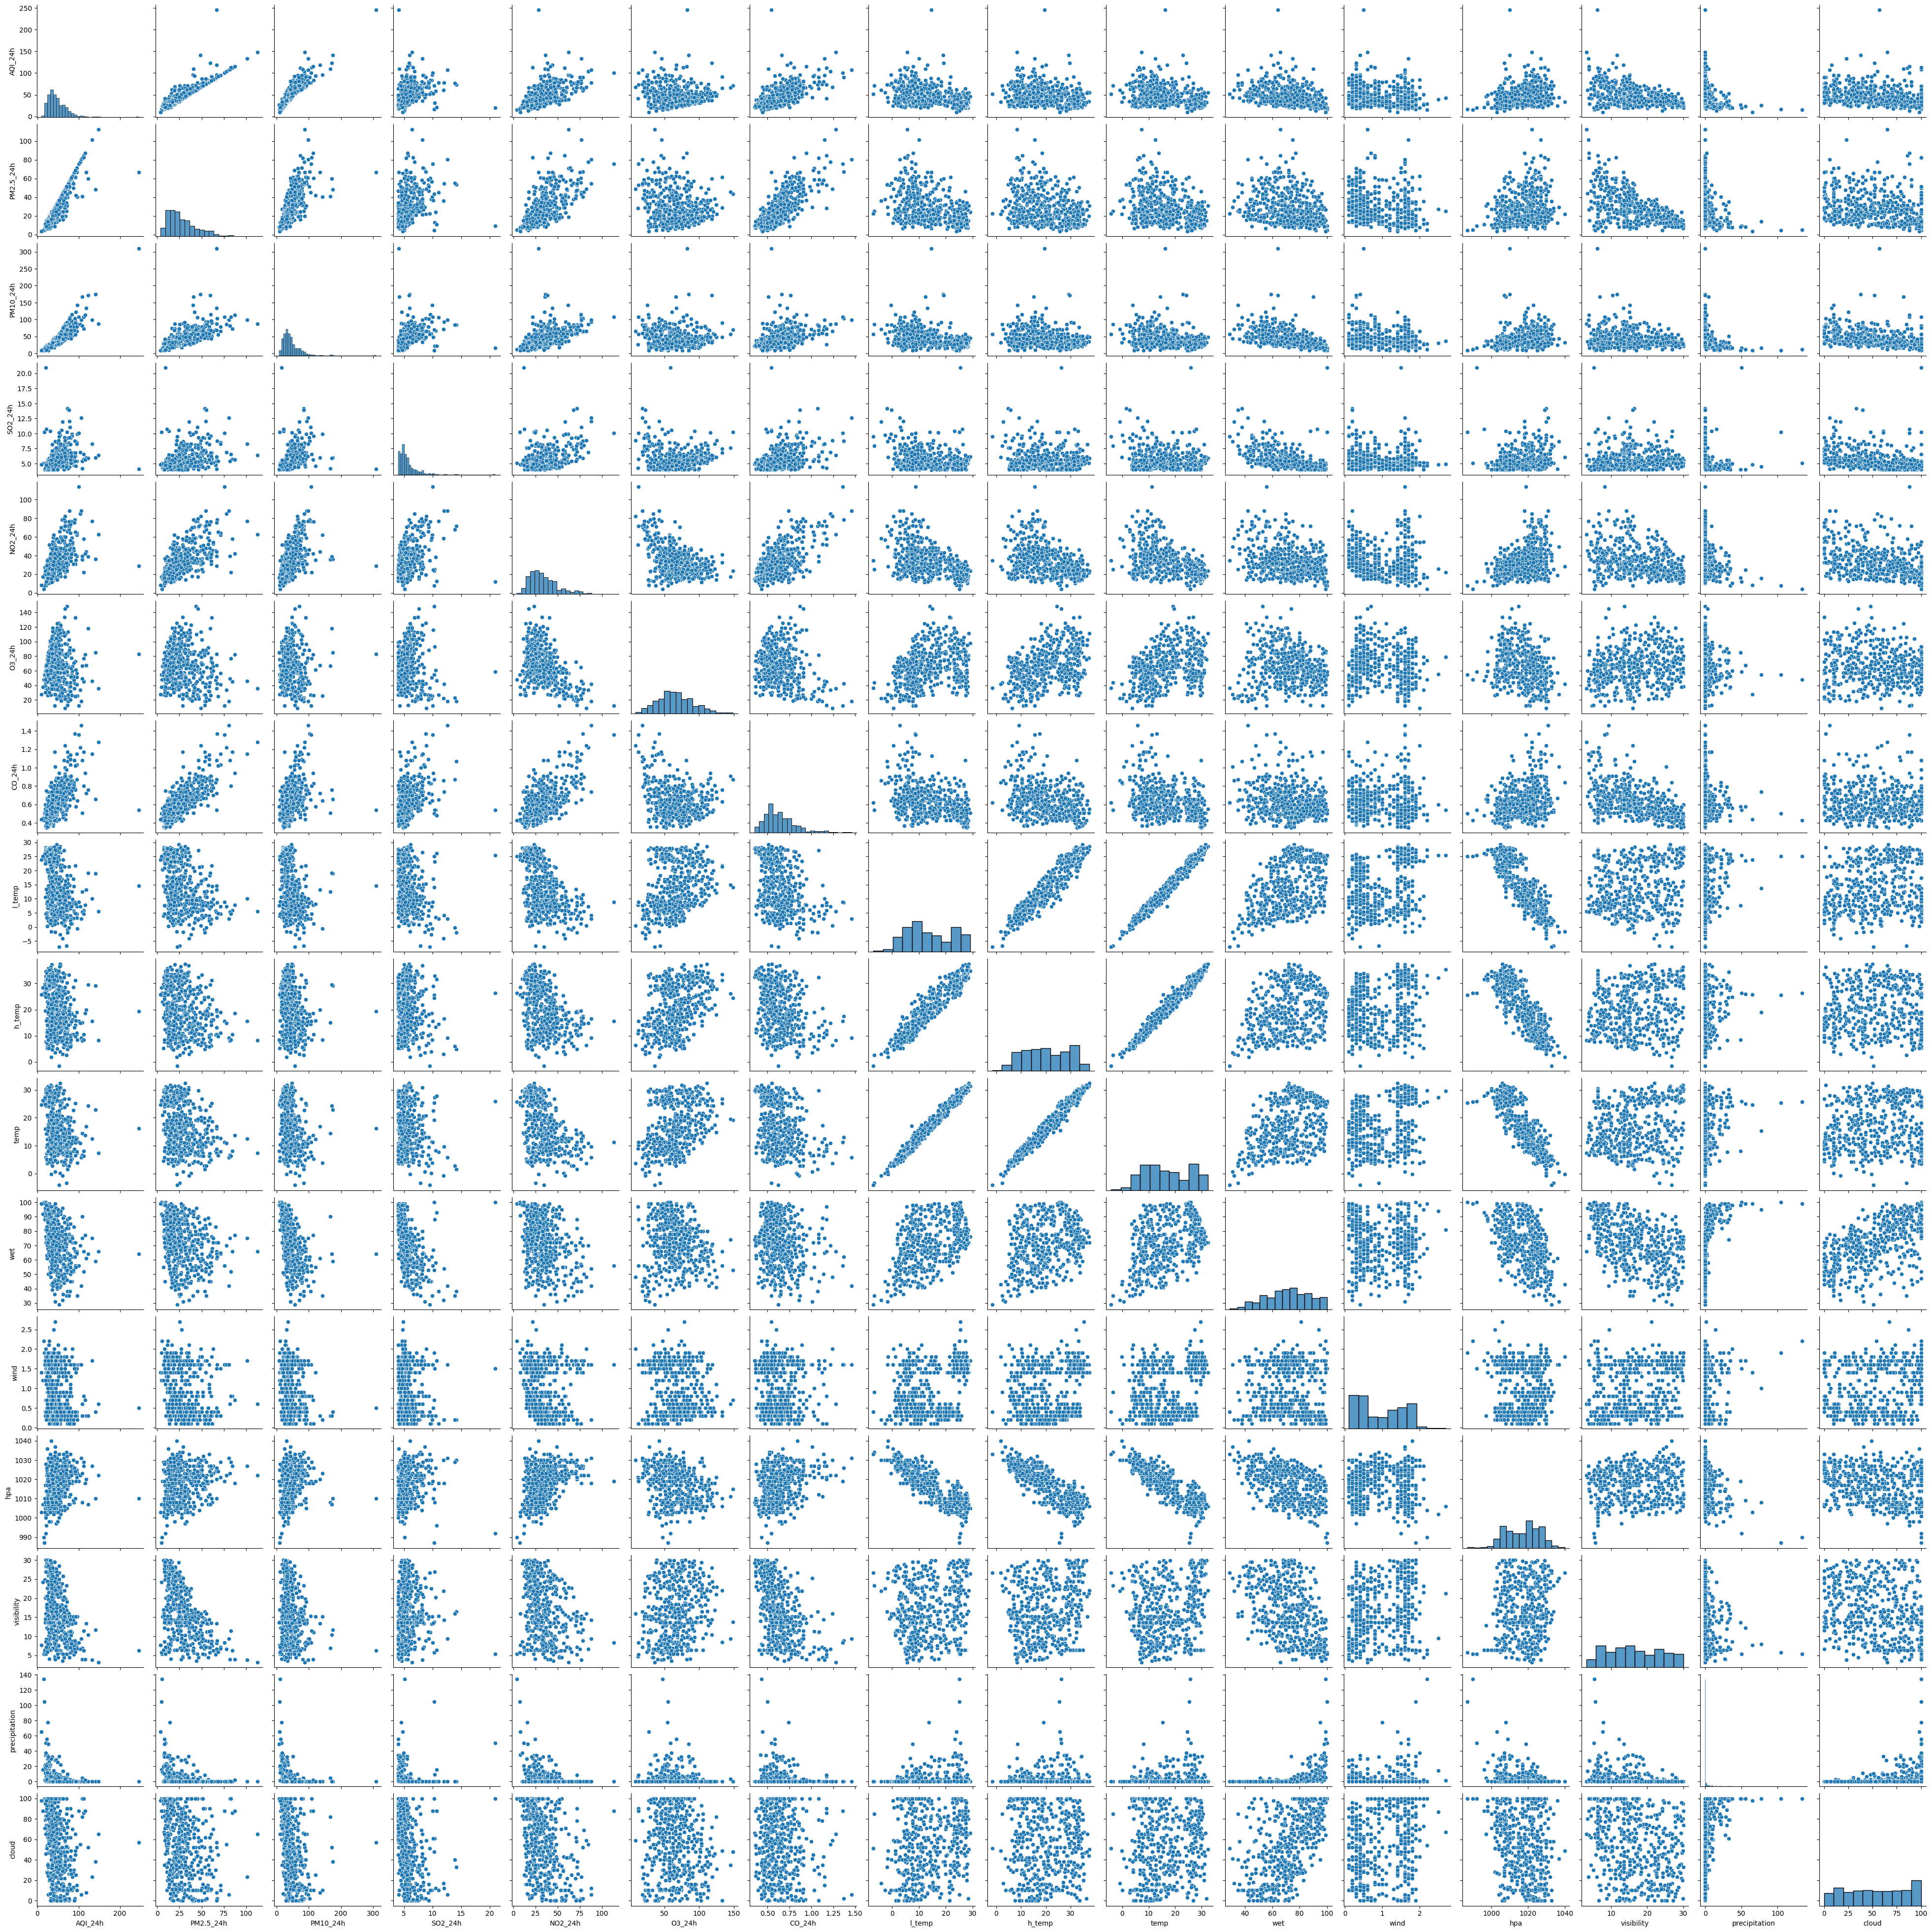

In [ ]:
g = sns.pairplot(df)

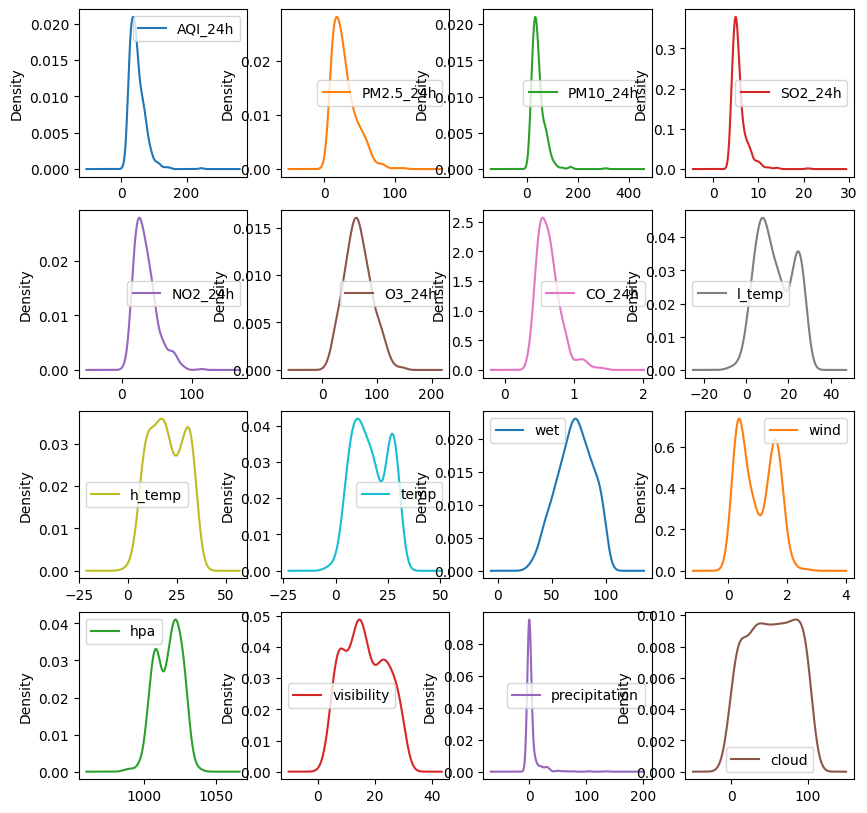

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10,10))
plt.show()